In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

In [13]:
cars = pd.read_csv("E:\CES\git\EDA\input\car_evaluation.csv", index_col = False)
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,2,big,low,unacc
freq,432,432,432,576,576,576,1210


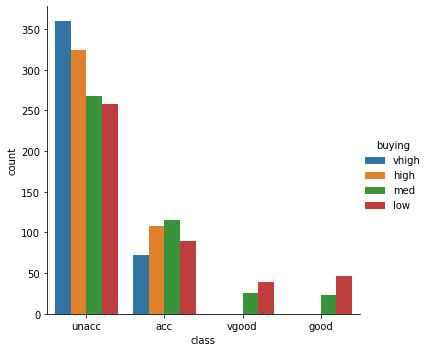

In [45]:
sns.catplot(x = "class", hue = "buying", kind = "count", data = cars)

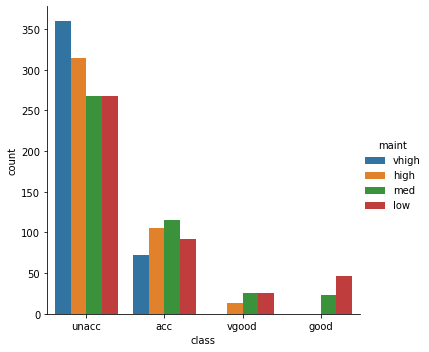

In [46]:
sns.catplot(x = "class", hue = "maint", kind = "count", data = cars)

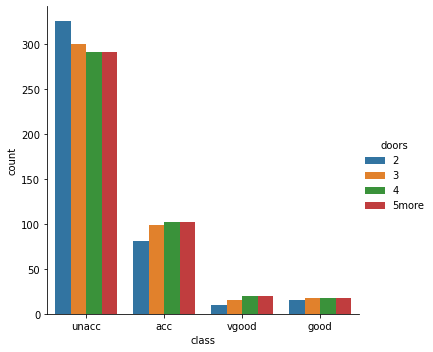

In [47]:
sns.catplot(x = "class", hue = "doors", kind = "count", data = cars)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
print(cars.buying.value_counts())
cars.buying = cars['buying'].astype("category").cat.codes
cars.buying.value_counts()

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64


3    432
2    432
1    432
0    432
Name: buying, dtype: int64

In [15]:
print(cars.maint.value_counts())
cars.maint = cars['maint'].astype("category").cat.codes
cars.maint.value_counts()

vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64


3    432
2    432
1    432
0    432
Name: maint, dtype: int64

In [16]:
cars["doors"] = cars['doors'].replace("5more", 5)
print(cars.doors.value_counts())
cars.doors = cars.doors.astype("category").cat.codes
cars.doors.value_counts()

3    432
2    432
4    432
5    432
Name: doors, dtype: int64


3    432
2    432
1    432
0    432
Name: doors, dtype: int64

In [17]:
cars.persons = cars.persons.replace("more", 5)
print(cars.persons.value_counts())
cars.persons = cars.persons.astype("category").cat.codes
cars.persons.value_counts()

2    576
4    576
5    576
Name: persons, dtype: int64


2    576
1    576
0    576
Name: persons, dtype: int64

In [18]:
print(cars.lug_boot.value_counts())
cars.lug_boot = cars.lug_boot.astype("category").cat.codes
cars.lug_boot.value_counts()

big      576
small    576
med      576
Name: lug_boot, dtype: int64


2    576
1    576
0    576
Name: lug_boot, dtype: int64

In [19]:
print(cars.safety.value_counts())
cars.safety = cars.safety.astype("category").cat.codes
cars.safety.value_counts()

low     576
high    576
med     576
Name: safety, dtype: int64


2    576
1    576
0    576
Name: safety, dtype: int64

In [20]:
cars["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [21]:
y = cars["class"]
x = cars.drop(columns = ["class"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

x_train.shape, x_test.shape

((1382, 6), (346, 6))

In [22]:
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

y_pre = dtree.predict(x_test)

accuracy_score(y_test, y_test)

1.0

In [23]:
# exporting the model
joblib.dump(dtree, "E:\CES\git\EDA\outputs\dtree_cars.sav")

['E:\\CES\\git\\EDA\\outputs\\dtree_cars.sav']

In [24]:
test_model = joblib.load("E:\CES\git\EDA\outputs\dtree_cars.sav")

In [26]:
test_model.predict(x_test)

array(['unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'good', 'good', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'vgood', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good',
 